In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from itertools import chain
import seaborn as sns
import matplotlib.image as mpimg
sns.set()
import os
# sns.reset_defaults()

In [42]:
locations={}
locations['C']=(300,480)
locations['F']=(20,300)
locations['P']=(450,400)
locations['O']=(570,250)
locations['T']=(230,130)

tloc={}
tloc['C']=(268,513)
tloc['F']=(-20,150)
tloc['P']=(420,430)
tloc['O']=(560,275)
tloc['T']=(160,70)

brainMap={}
brainMap['C']='Central'
brainMap['F']='Frontal'
brainMap['P']='Parietal'
brainMap['O']='Occipital'
brainMap['T']='Temporal'

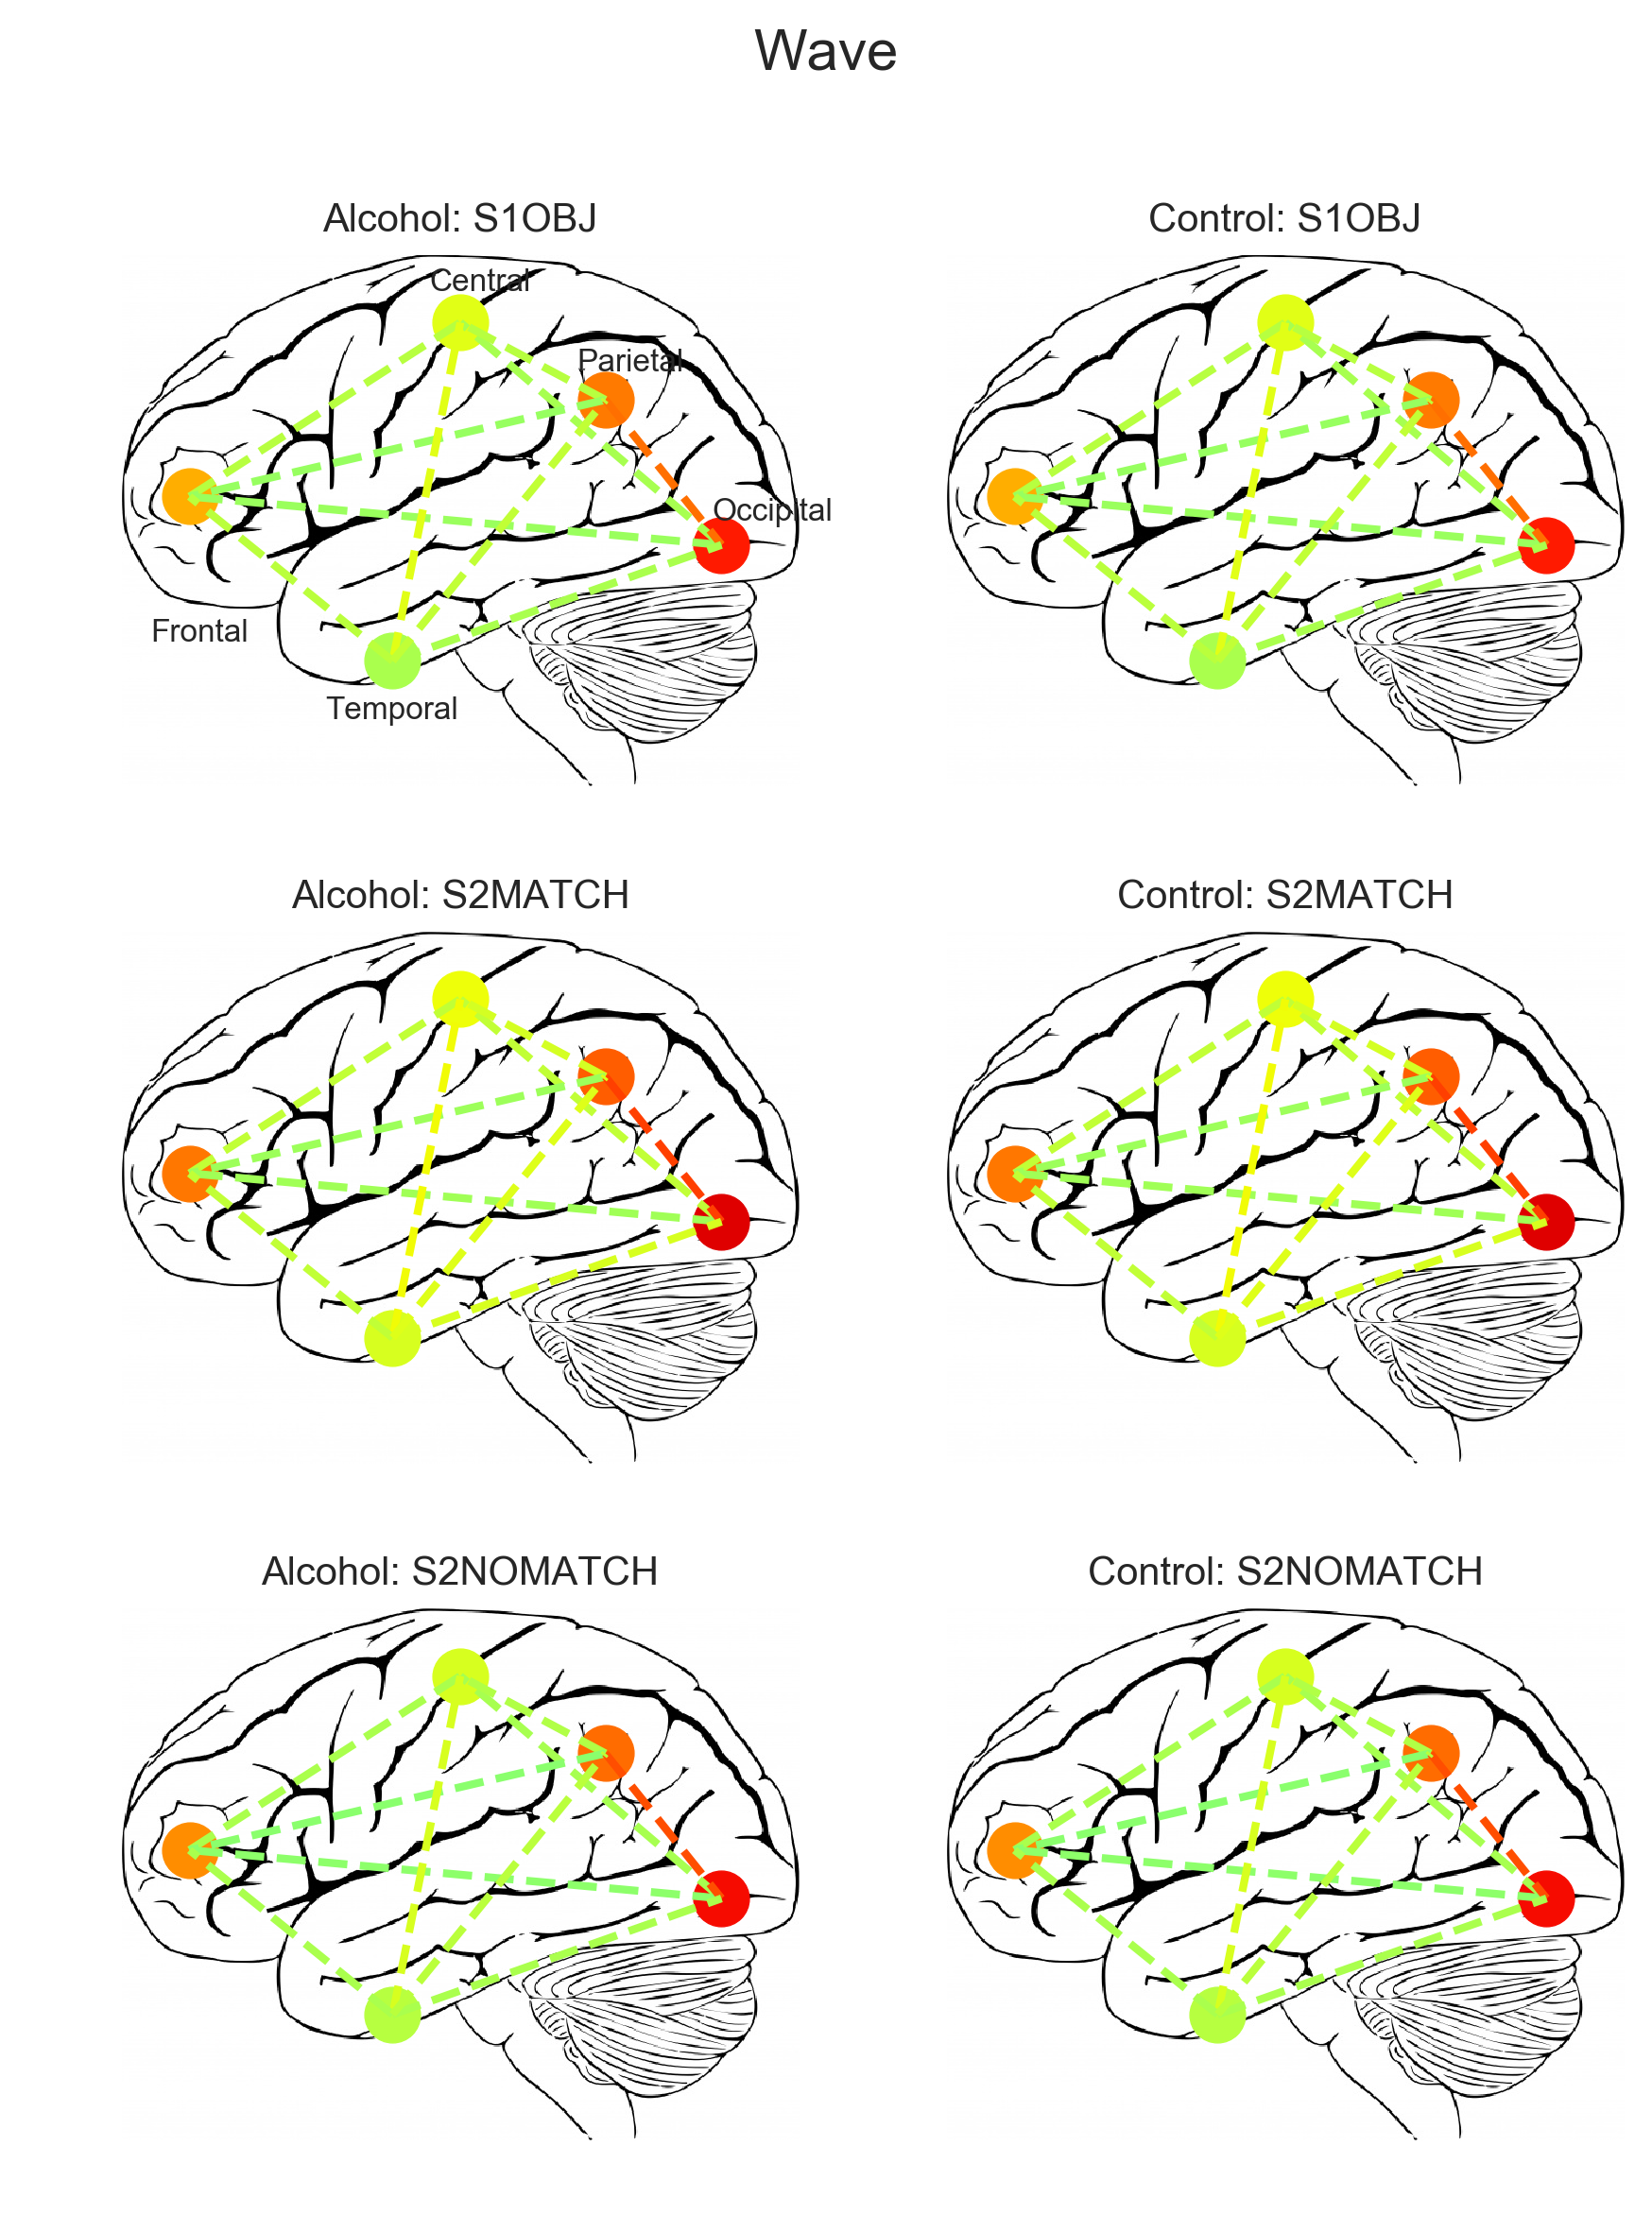

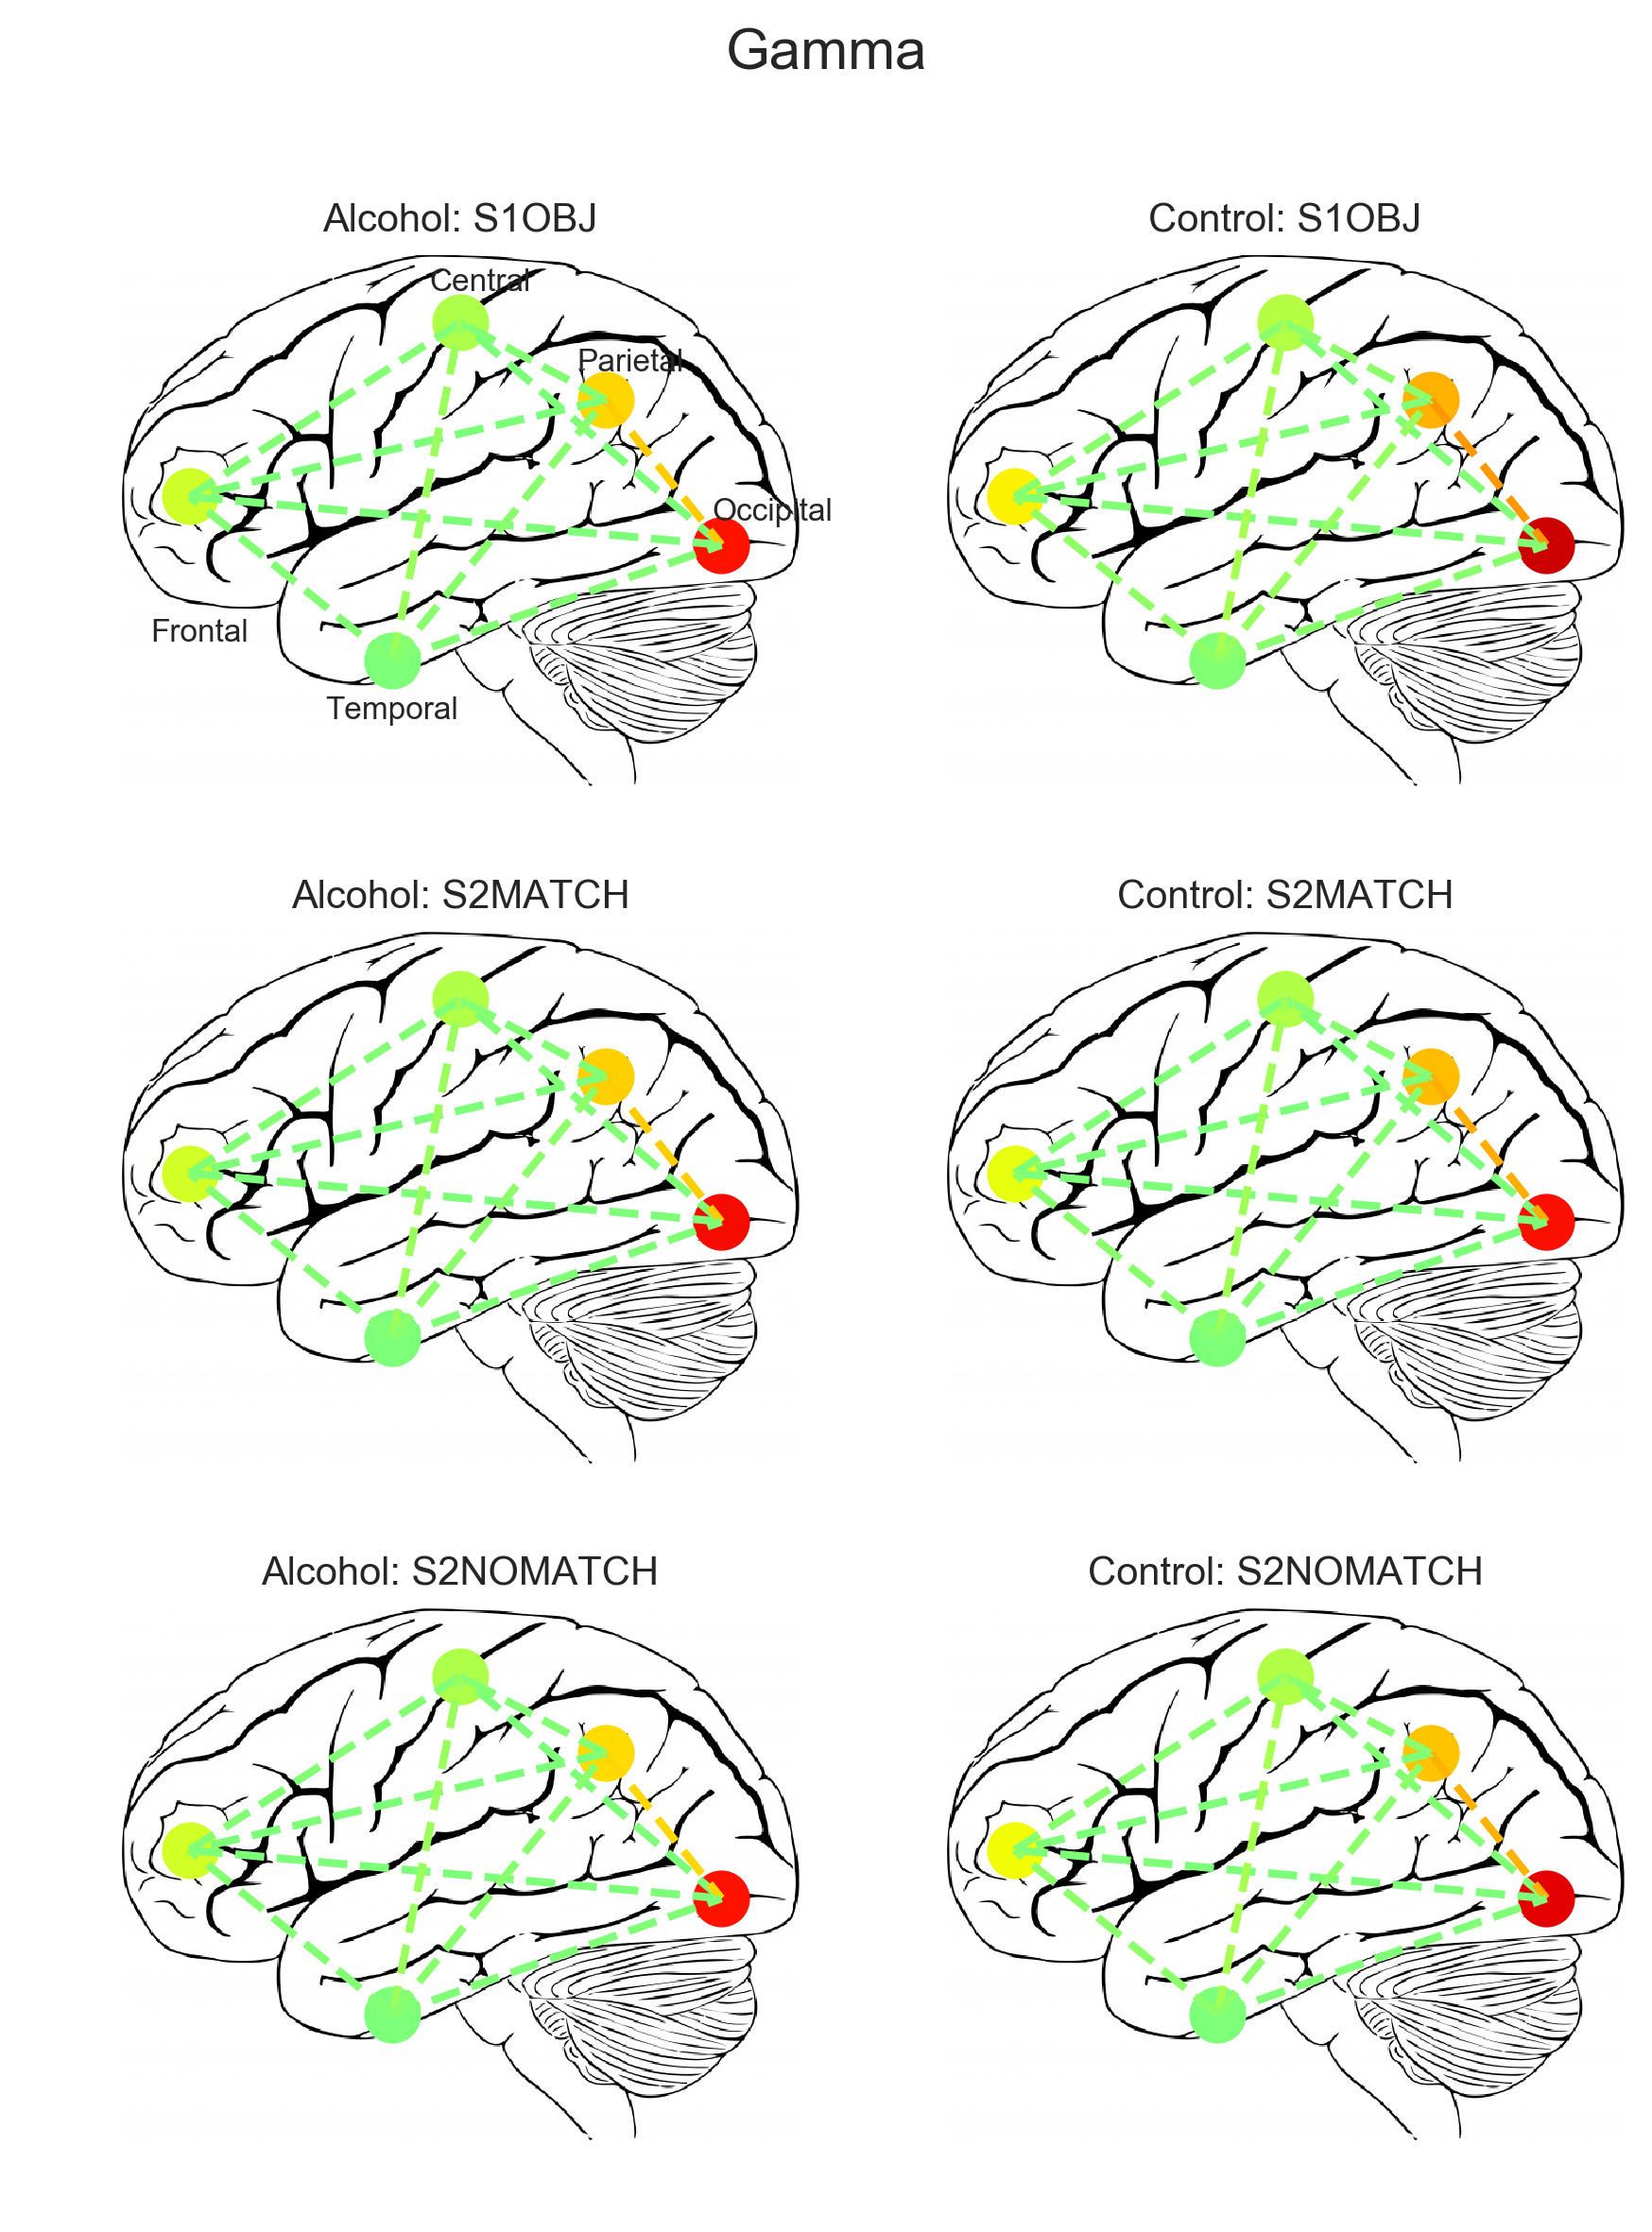

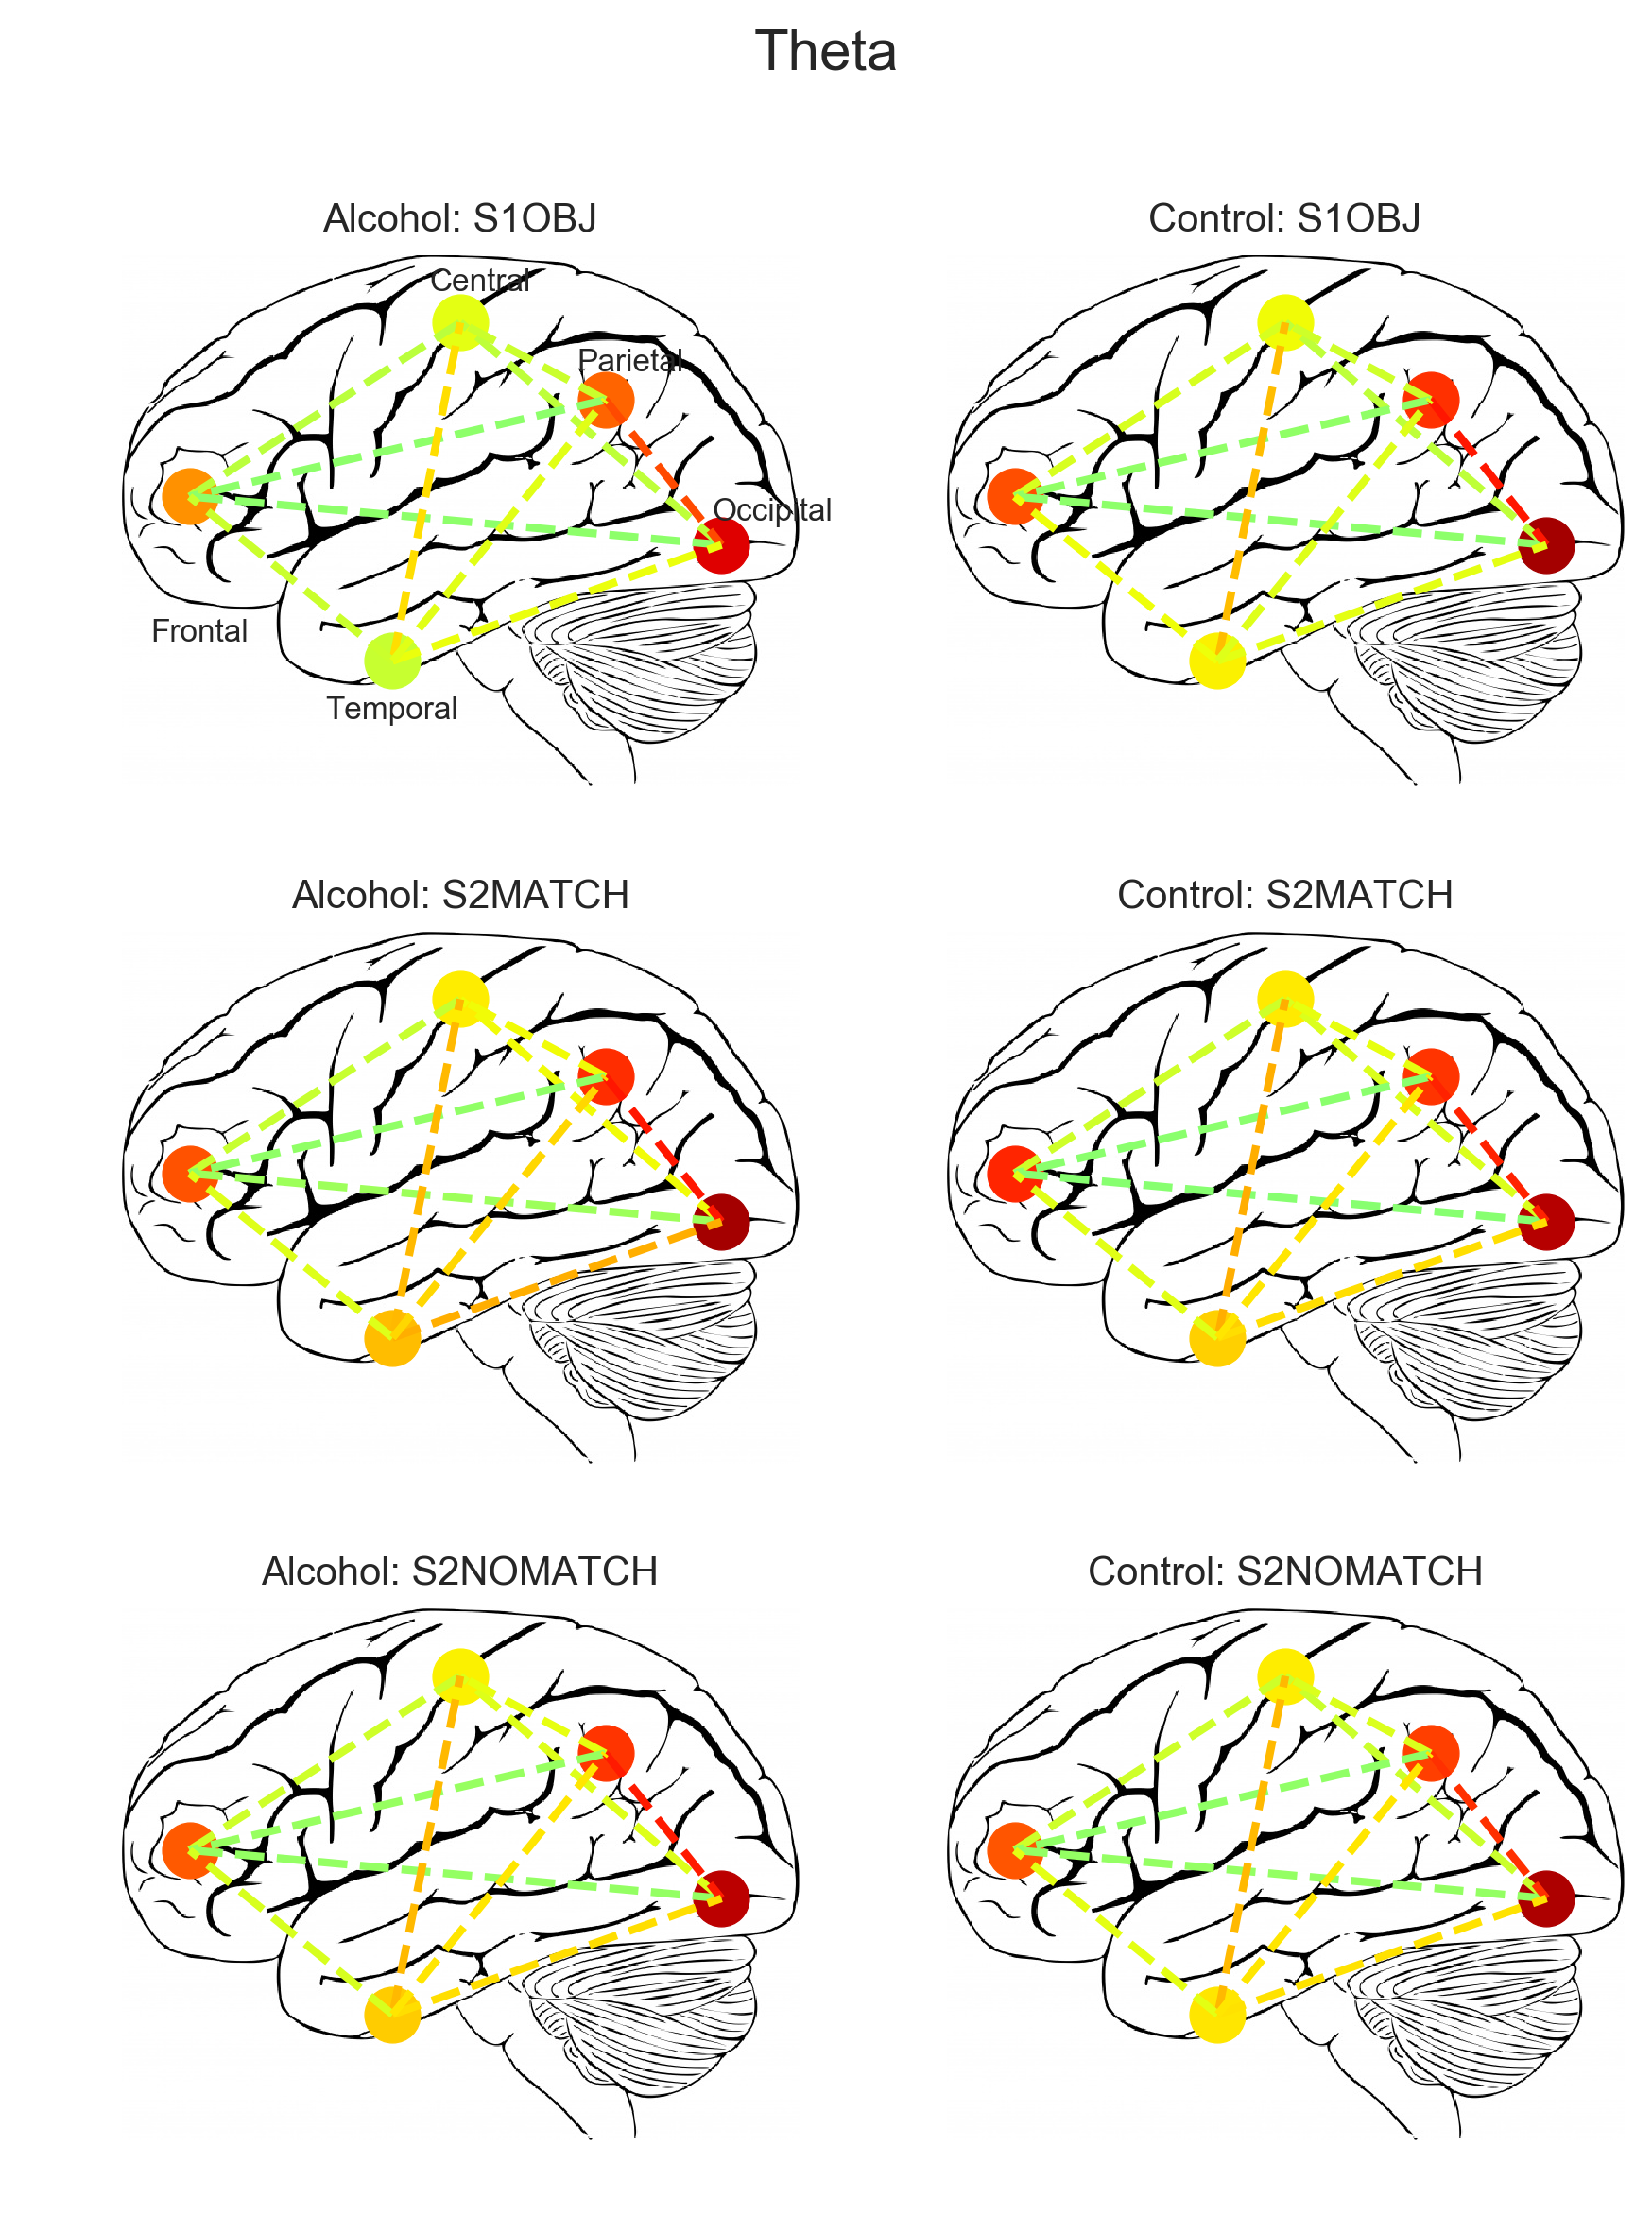

In [45]:
cmap=plt.get_cmap("jet")
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
bwaves = ["Wave","Gamma","Beta","Alpha","Theta","Delta"]
#bwaves =["Wave","Peel"]
for bwave in bwaves:
    path="activation/"
    if bwave=="Wave":
#         activationA=pickle.load(open(path+"alcoholActivation.pickle","rb"))
#         activationC=pickle.load(open(path+"controlActivation.pickle","rb"))
        activationA=pickle.load(open(path+"alcoholActivation.pickle","rb"))
        activationC=pickle.load(open(path+"controlActivation.pickle","rb"))
        #bwave=''
    else:
        activationA=pickle.load(open(path+"alcohol_{}Activation.pickle".format(bwave),"rb"))
        activationC=pickle.load(open(path+"control_{}Activation.pickle".format(bwave),"rb"))
#     print(activationA)
#     print(activationC)
    titleSize=10
    plt.close()
    plt.figure(figsize = (6,8), dpi = 300)
    gs = gridspec.GridSpec(3,4)

    # Alcohol
    fool=0
    row,col=0,0    
    for stimulus in activationA:
        plt.axis("off")
        ax = plt.subplot(gs[row,0:2])   
        row+=1
        img=mpimg.imread('brain.jpg')
        ax.imshow(img, extent=[-50, 650, 0, 550])
        for sensor in activationA[stimulus]:
            a,b=chain(sensor.split('-'))
            weight=activationA[stimulus][sensor]
            if a!=b:     
                locA=locations[a]
                locB=locations[b]

                color=(weight+1)/2
                ax.plot([locA[0],locB[0]], [locA[1],locB[1]], '--', linewidth=2, color=cmap(color))
            else:
                locA=locations[a]
                color=(weight+1)/2
                #color=weight
                ax.scatter(locA[0],locA[1],s=200,color=cmap(color))
                if fool==0:
                    ax.text(tloc[a][0], tloc[a][1], brainMap[a], fontsize=8)
        fool=1
        plt.title("Alcohol: "+stimulus.upper(),size=titleSize)

    # Control
    row,col=0,0    
    for stimulus in activationC:
        plt.axis("off")
        ax = plt.subplot(gs[row,2:4])   
        row+=1
        ax.imshow(img, extent=[-50, 650, 0, 550])
        for sensor in activationC[stimulus]:
            a,b=chain(sensor.split('-'))
            weight=activationC[stimulus][sensor]
            if a!=b:     
                locA=locations[a]
                locB=locations[b]

                color=(weight+1)/2
                ax.plot([locA[0],locB[0]], [locA[1],locB[1]], '--', linewidth=2, color=cmap(color))
            else:
                locA=locations[a]
                color=(weight+1)/2
                #color=weight
                ax.scatter(locA[0],locA[1],s=200,color=cmap(color))
                #ax.text(tloc[a][0], tloc[a][1], brainMap[a], fontsize=8)
        plt.title("Control: "+stimulus.upper(),size=titleSize)

    plt.axis("off")
    plt.tight_layout()
    plt.suptitle("{}".format(bwave))
    #plt.subplots_adjust()
    plt.subplots_adjust(top=0.88,wspace=None, hspace=None)
    #plt.savefig("connections/{}.png".format(bwave),bbox_inches='tight')
    #plt.savefig("waveAndPeel/SUPP/{}Std.png".format(bwave),bbox_inches='tight')
    plt.show()

In [40]:
cmap=plt.get_cmap("jet")
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
bwaves = ["Wave","Gamma","Beta","Alpha","Theta","Delta"]
for bwave in bwaves:
    path="activation/"
    if bwave=="Wave":
#         activationA=pickle.load(open(path+"alcoholActivation.pickle","rb"))
#         activationC=pickle.load(open(path+"controlActivation.pickle","rb"))
        activationA=pickle.load(open(path+"alcoholActivationStd0.5.pickle","rb"))
        activationC=pickle.load(open(path+"controlActivationStd0.5.pickle","rb"))
        #bwave=''
    else:
        activationA=pickle.load(open(path+"alcohol_{}ActivationStd0.5.pickle".format(bwave),"rb"))
        activationC=pickle.load(open(path+"control_{}ActivationStd0.5.pickle".format(bwave),"rb"))
#     print(activationA)
#     print(activationC)
    titleSize=10
    plt.close()
    plt.figure(figsize = (6,8), dpi = 300)
    gs = gridspec.GridSpec(3,4)

    # Alcohol
    fool=0
    row,col=0,0    
    for stimulus in activationA:
        plt.axis("off")
        ax = plt.subplot(gs[row,0:2])   
        row+=1
        img=mpimg.imread('brain.jpg')
        ax.imshow(img, extent=[-50, 650, 0, 550])
        for sensor in activationA[stimulus]:
            a,b=chain(sensor.split('-'))
            weight=activationA[stimulus][sensor]
            if a!=b:     
                locA=locations[a]
                locB=locations[b]

                color=(weight+1)/2
                ax.plot([locA[0],locB[0]], [locA[1],locB[1]], '--', linewidth=2, color=cmap(color))
            else:
                locA=locations[a]
                color=(weight+1)/2
                #color=weight
                ax.scatter(locA[0],locA[1],s=200,color=cmap(color))
                if fool==0:
                    ax.text(tloc[a][0], tloc[a][1], brainMap[a], fontsize=8)
        fool=1
        plt.title("Alcohol: "+stimulus.upper(),size=titleSize)

    # Control
    row,col=0,0    
    for stimulus in activationC:
        plt.axis("off")
        ax = plt.subplot(gs[row,2:4])   
        row+=1
        ax.imshow(img, extent=[-50, 650, 0, 550])
        for sensor in activationC[stimulus]:
            a,b=chain(sensor.split('-'))
            weight=activationC[stimulus][sensor]
            if a!=b:     
                locA=locations[a]
                locB=locations[b]

                color=(weight+1)/2
                ax.plot([locA[0],locB[0]], [locA[1],locB[1]], '--', linewidth=2, color=cmap(color))
            else:
                locA=locations[a]
                color=(weight+1)/2
                #color=weight
                ax.scatter(locA[0],locA[1],s=200,color=cmap(color))
                #ax.text(tloc[a][0], tloc[a][1], brainMap[a], fontsize=8)
        plt.title("Control: "+stimulus.upper(),size=titleSize)

    plt.axis("off")
    plt.tight_layout()
    plt.suptitle("{} (StD): Threshold-0.5".format(bwave),size=10)
    #plt.subplots_adjust()
    plt.subplots_adjust(top=0.92,wspace=None, hspace=None)
    #plt.savefig("connections/{}.png".format(bwave),bbox_inches='tight')
    try:
        os.mkdir('waveAndPeel/SUPP/0-5/')
    except:
        pass
    plt.savefig("waveAndPeel/SUPP/0-5/Std{}0-5.png".format(bwave),bbox_inches='tight')
    #plt.show()